##Importing the libraries 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('./clean_data/bbc_articles.csv')
df['Authors'] = df['Authors'].apply(lambda x: json.loads(x))

##First step :

Counting the number of articles in each category and creating a bar chart to display the results.

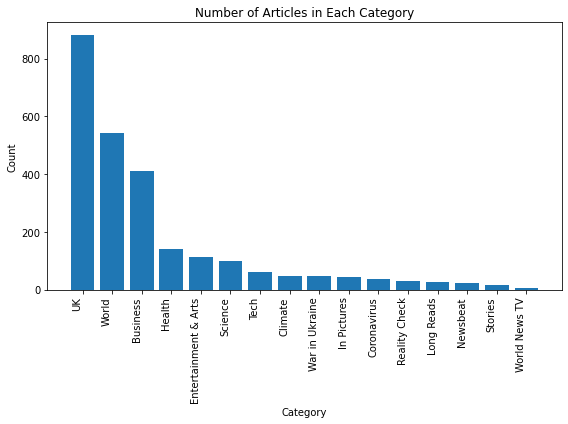

In [ ]:
# Count the number of articles in each category
category_counts = df['Category'].value_counts()

# Plot the category counts in a bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(category_counts.index, category_counts.values)
ax.set_title('Number of Articles in Each Category')
ax.set_xlabel('Category')
ax.set_ylabel('Count')
plt.xticks(rotation=90, ha='right') # adjust x-axis tick labels for better visibility
plt.tight_layout() # improve layout
plt.show()

##Second step:

We will be analysing the authors column of the given respective Pandas DataFrame.

In [ ]:
# Flatten authors column and get value counts
authors_counts = df.explode('Authors')['Authors'].value_counts()

# Get top three authors with most articles
top_authors_most = authors_counts.head(11)
top_authors_most_percent = (top_authors_most / authors_counts.sum()) * 100

# Get top three authors with least articles
top_authors_least = authors_counts.tail(3)
top_authors_least_percent = (top_authors_least / authors_counts.sum()) * 100

# Print results
print("Top three authors with the most articles:")
print(top_authors_most)
print(top_authors_most_percent)

print("______________________________________________")
print("______________________________________________")

print("Top three authors with the least articles:")
print(top_authors_least)
print(top_authors_least_percent)

Top three authors with the most articles:
N/A                1160
Natalie Sherman      29
John Campbell        23
Annabelle Liang      21
Faisal Islam         17
Sam Cabral           16
Tom Housden          16
Sean Seddon          16
Brandon Drenon       16
Will Smale           15
Suzanne Bearne       15
Name: Authors, dtype: int64
N/A                40.945994
Natalie Sherman     1.023650
John Campbell       0.811860
Annabelle Liang     0.741264
Faisal Islam        0.600071
Sam Cabral          0.564772
Tom Housden         0.564772
Sean Seddon         0.564772
Brandon Drenon      0.564772
Will Smale          0.529474
Suzanne Bearne      0.529474
Name: Authors, dtype: float64
______________________________________________
______________________________________________
Top three authors with the least articles:
Tim Donovan       1
Michael Sheen     1
Daniel Kraemer    1
Name: Authors, dtype: int64
Tim Donovan       0.035298
Michael Sheen     0.035298
Daniel Kraemer    0.035298
Name: Autho

As mentioned, in our result, most of the results have a N/A. So the author name is not mentionned. We have a little bit of bias, since the N/A is more than the actual number of authors. The three top authors are then: Natalie Sherman, John Campbell and finally Annebelle Liang.

The top three authors with the least articles which is 1 are : Dim Donovan, Micheal Sheen and finally Daniel Kraemer. We cant say something to explain the reason why they have the least number of articles, since the bias exists and the name of articles with N/A as a name of authors exists.. So Maybe the reason is that the career of these authors just started or they have articles but they were not mentionned when we did the extraction of data. 

##Third step:

 In this part, we are constructing and visualising a graph of author collaborations based on a given DataFrame, where each node represents an author, and edges represent collaborations between them, and bigger nodes represent authors with higher degree.

C:\Users\DevOps\AppData\Local\Temp/ipykernel_5736/2766283677.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Authors'] = df['Authors'].replace('N/A', pd.np.nan)


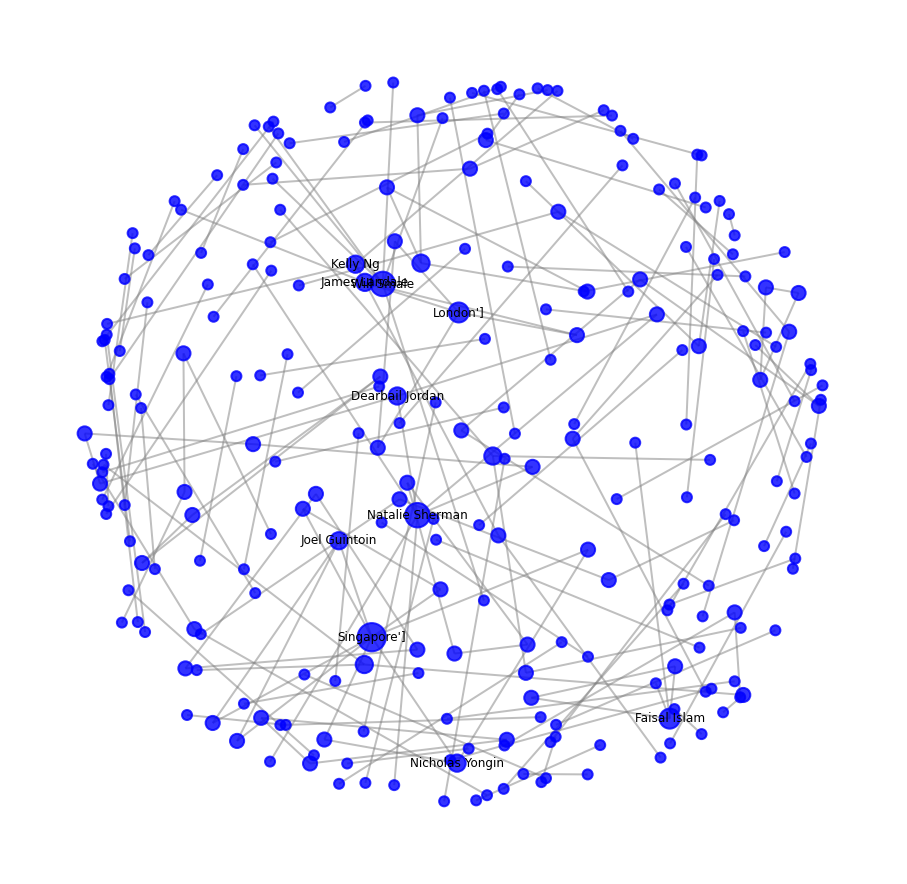

In [ ]:
import networkx as nx

# Replace "N/A" values with NaN
df['Authors'] = df['Authors'].replace('N/A', pd.np.nan)

# Drop rows with missing values
df = df.dropna(subset=['Authors'])

# Split multiple authors into separate rows
authors_df = df.explode('Authors')

# Create a list of author pairs
pairs = []
for authors in df['Authors']:
    for i in range(len(authors)):
        for j in range(i+1, len(authors)):
            pairs.append((authors[i], authors[j]))

# Create a graph and add edges
G = nx.Graph()
for pair in pairs:
    G.add_edge(pair[0], pair[1])

# Filter authors with no collaborations
isolated_nodes = [n for n in G.nodes() if G.degree(n) == 0]
G.remove_nodes_from(isolated_nodes)


# Compute the degree of each node
node_degrees = dict(G.degree())

# calculate the node sizes based on the node degrees
node_sizes = [node_degrees[node] * 100 for node in G.nodes()]

# calculate the node positions using the spring layout algorithm
pos = nx.spring_layout(G, k=.5)

# draw the graph with bigger nodes for top 10 nodes
fig = plt.figure(figsize=(16, 16), facecolor='white')
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue', alpha=0.8, linewidths=2)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, width=2)
nx.draw_networkx_labels(G, pos, {n: n if n in top_nodes else '' for n in G.nodes()}, font_size=12, font_family='sans-serif')
plt.show()

We can conclude that the authors with the more collaboration are Natalie Sherman, Singapore, London' and Dearbail Jordan. We could see a group of authors interacting with each other. Natalie got the highest number of articles so maybe it's due to the fact that she got the higher degree's value. So we may say that the number of article produced correlate with how many collaboration the authors has with other authors ?

##Fourth Step: 

In this part, we are extracting the frequency of topics in a given DataFrame, filtering out topics with less than 40 occurrences, and visualising the result using a bar plot.

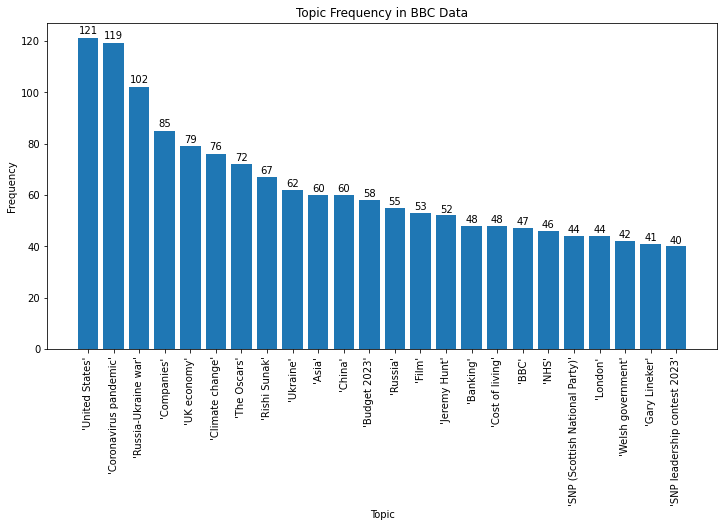

In [ ]:
# create an empty dictionary to store the frequency of each topic
topic_freq = {}

# iterate through each row in the DataFrame
for index, row in df.iterrows():
    # check if the value in the 'Topic' column is a string
    if isinstance(row['Topic'], str):
        # extract the list of topics from the 'Topic' column
        topics = row['Topic'].strip('][').split(', ')
        # iterate through each topic and update the frequency count
        for topic in topics:
            if topic in topic_freq:
                topic_freq[topic] += 1
            else:
                topic_freq[topic] = 1

# filter out topics with frequency less than 40
topic_freq = {k:v for k,v in topic_freq.items() if v >= 40}

# convert the dictionary to a pandas Series and sort by frequency
topic_series = pd.Series(topic_freq).sort_values(ascending=False)

# create a bar plot of the frequency of each topic
fig, ax = plt.subplots(figsize=(12,6))
rects = ax.bar(topic_series.index, topic_series.values)

# set the title and axis labels
ax.set_title('Topic Frequency in BBC Data')
ax.set_xlabel('Topic')
ax.set_ylabel('Frequency')

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# add text labels with the frequency on top of each bar
for rect in rects:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
            f'{int(height)}',
            ha='center', va='bottom')

# show the plot
plt.show()

We can see from the charts that the topics that are the most cited are topics related to United States and COVID as well as the Russia Ukraine War. I dont think there is a bias since the topics correlates with what was happening back then in the world. 

##Fifth Step

In this part we are extracting the list of topics from each row of a DataFrame, duplicating each article with a single topic, filtering the DataFrame for topics of interest, and creating a pivot table to count the number of articles for each topic and date, before plotting the data as separate line charts with labels and a legend.

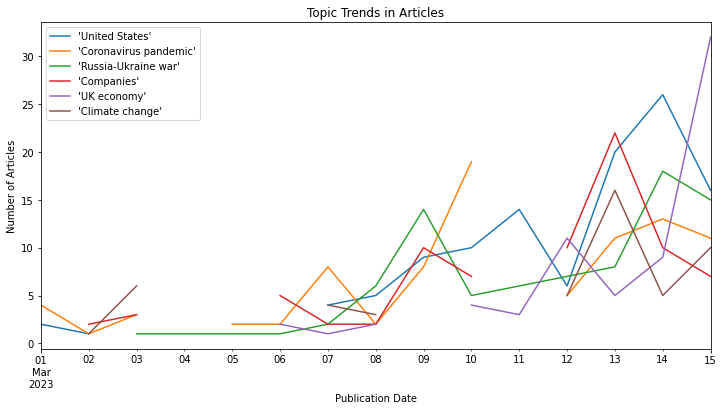

In [ ]:
# Extract the list of topics from each row and create a new column with the list
df['Topics'] = df['Topic'].apply(lambda x: x.strip('][').split(', ') if isinstance(x, str) else [])

# Explode the DataFrame so that each article is duplicated with a single topic
df = df.explode('Topics')

# Keep only the topics of interest
topics_of_interest = ["'United States'", "'Coronavirus pandemic'", "'Russia-Ukraine war'", "'Companies'", "'UK economy'", "'Climate change'"]
df = df[df['Topics'].isin(topics_of_interest)]

# Convert the 'Date' column to a Pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data from 01/03/2023 to today
df = df[df['Date'] >= '2023-03-01']

# Count the number of articles for each topic and date
topic_counts = df.groupby(['Date', 'Topics']).size().reset_index(name='Count')

# Pivot the table to have each topic as a column
topic_pivot = topic_counts.pivot(index='Date', columns='Topics', values='Count')

# Plot the data as separate line charts
for topic in topics_of_interest:
    if topic in topic_pivot.columns:
        topic_pivot[topic].plot(figsize=(12, 6), label=topic)

# Add labels and legend
plt.title('Topic Trends in Articles')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.legend(loc='upper left')

# Show the plot
plt.show()

We can conclude that the topics around UK Economy are the one trending lately. The topic around companies are mentioned throughout the month of march and there is not a single date where the topics are mentioned. The interesting thing is that in 2023, the topic around CoronaVirus is still mentioned. 

##Sixth Step:

In this part, we vectorize title and text data from a dataframe, then calculate their cosine similarity, and finally display the result as a heatmap using seaborn.

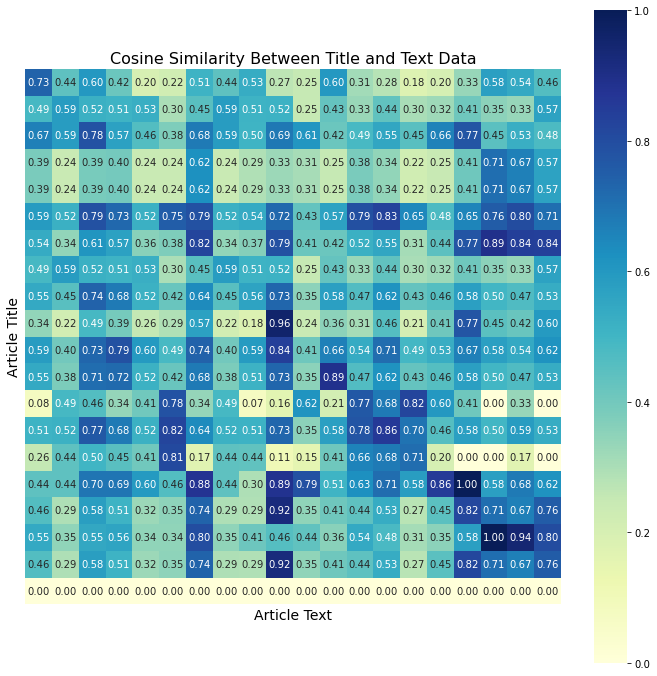

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

df.dropna(subset=['Title', 'Text'], inplace=True)

# Create a CountVectorizer with the desired configuration
vectorizer = CountVectorizer(stop_words='english', lowercase=True, max_df=0.95, min_df=2, max_features=5000)

# Vectorize the title data
X_title = vectorizer.fit_transform(df['Title'].values.astype('U')[:20])

# Vectorize the text data using the same vectorizer
X_text = vectorizer.transform(df['Text'].values.astype('U')[:20])

# Compute the cosine similarity between the title and text data
similarity = cosine_similarity(X_title, X_text)

# Create the heatmap using seaborn
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(similarity, cmap='YlGnBu', annot=True, fmt='.2f', xticklabels=False, yticklabels=False, square=True, ax=ax)

# Set the plot title and axis labels
ax.set_title('Cosine Similarity Between Title and Text Data', fontsize=16)
ax.set_xlabel('Article Text', fontsize=14)
ax.set_ylabel('Article Title', fontsize=14)

# Show the plot
plt.show()
